In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and logistic regression libraries from scikit learn

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm

# Importing necessary libraries for roc curve
from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

# importing necessary library  accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

# importing precision recall curve from sklearn library 
from sklearn.metrics import precision_recall_curve, f1_score

from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [3]:
# reading the csv file
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.shape


(9240, 37)

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Has null values of 46%
Asymmetrique Activity Index ,Asymmetrique Profile Index,Asymmetrique Activity Score ,Asymmetrique Profile Score  
## Has null values of 52%
Lead Quality
## Has null values of 27%
Country

## checking all the statistical information of numerical variables

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## There are 7 numerical columns and rest are non numerical columns

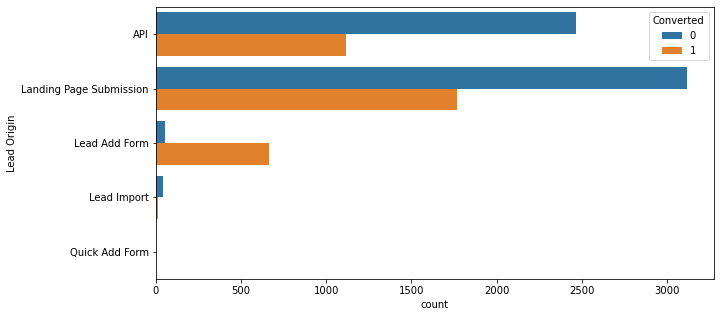

In [7]:
#Understanding Lead Conversion and Lead Origin
plt.figure(figsize=(10, 5))
sns.countplot(y="Lead Origin", hue="Converted", data=leads)
plt.show()

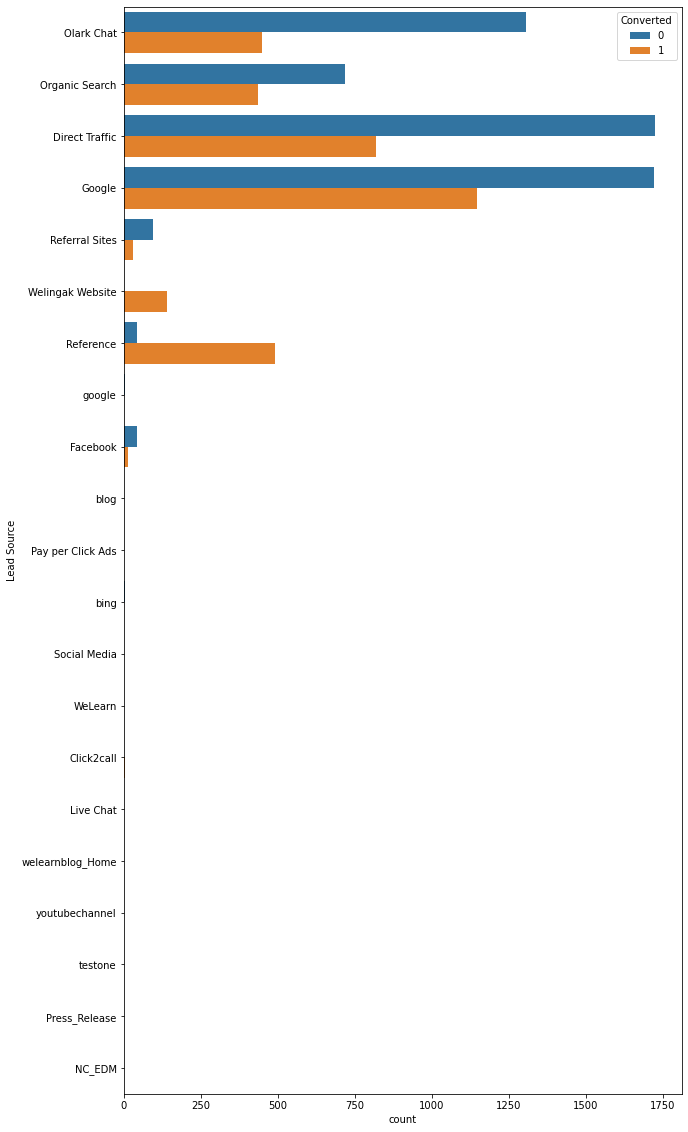

In [8]:
#Understanding Lead Conversion and Lead Source
plt.figure(figsize=(10, 20))
sns.countplot(y="Lead Source", hue="Converted", data=leads)
plt.show()

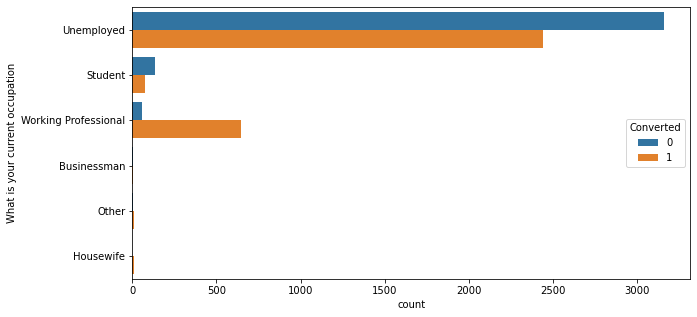

In [9]:
#Understanding Lead Conversion and Current Occupation 
plt.figure(figsize=(10, 5))
sns.countplot(y="What is your current occupation", hue="Converted", data=leads)
plt.show()

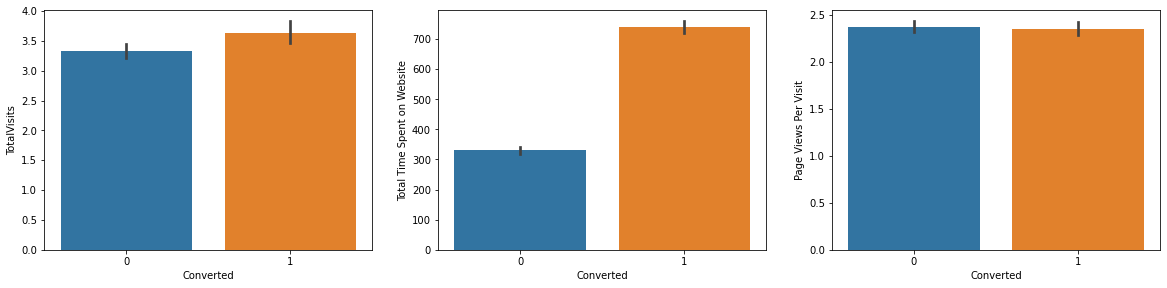

In [10]:
#Understanding the Lead Conversion on TotalVisits, Total Time Spent on Website, Page Views Per Visit
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.barplot(x = 'Converted', y = 'TotalVisits', data = leads)

plt.subplot(3,3,2)
sns.barplot(x = 'Converted', y = 'Total Time Spent on Website',data = leads)

plt.subplot(3,3,3)
sns.barplot(x = 'Converted', y = 'Page Views Per Visit',data = leads)

plt.show()

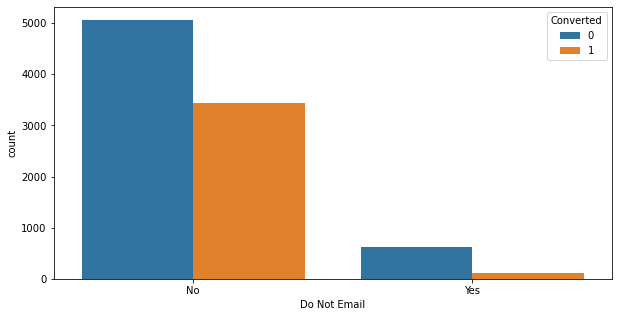

In [11]:
#Understanding Lead Conversion and Do Not Email 
plt.figure(figsize=(10, 5))
sns.countplot(x="Do Not Email", hue="Converted", data=leads)
plt.show()

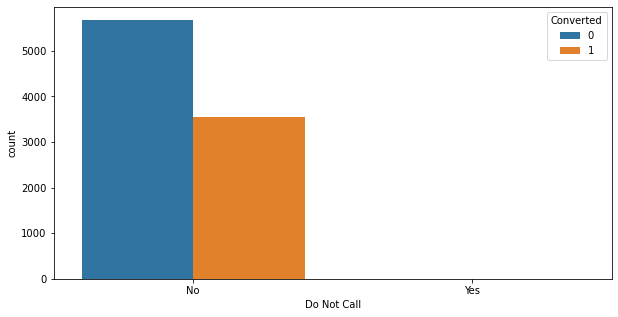

In [12]:
#Understanding Lead Conversion and Do Not Call
plt.figure(figsize=(10, 5))
sns.countplot(x="Do Not Call", hue="Converted", data=leads)
plt.show()

 ## Observations from EDA Process - 
#### - Maximum lead conversion happened from Landing Page Submission.
#### - Major lead conversion in the lead source is from 'Google'
#### - Major lead conversion is from the Unemployed Group and also some of them comes from professionals
#### - Major lead conversion from TotalVisits, Total Time Spent on Website, Page Views Per Visit
#### - Major conversion has happened from the emails that have been sent

## Making backup of leads

In [13]:

df=leads.copy()
df.loc[0]

Prospect ID                                      7927b2df-8bba-4d29-b9a2-b6e0beafe620
Lead Number                                                                    660737
Lead Origin                                                                       API
Lead Source                                                                Olark Chat
Do Not Email                                                                       No
Do Not Call                                                                        No
Converted                                                                           0
TotalVisits                                                                         0
Total Time Spent on Website                                                         0
Page Views Per Visit                                                                0
Last Activity                                                 Page Visited on Website
Country                                               

In [14]:
# checking the value counts of each variables to find insights

for i in leads.columns:
    print(leads[i].value_counts())
    print('---------------------------------------')

8de9dcc7-f06f-48fc-bd52-1285789eed78    1
c5ef3a51-c92a-474a-a33a-7df40e514b14    1
bd98d9bf-aea6-4b38-88d4-b32de8f6741f    1
b99658d8-95a9-426e-ad9a-71fa7c5111a8    1
4e7b3ead-5c97-427c-905f-4bcbd88aacf5    1
                                       ..
e0958d83-0873-4411-830c-4bf6a0238f0e    1
d546d19c-b105-49ba-b478-a69c19cd2abd    1
c8a7c3a6-20c9-4b5f-8189-b74e86148117    1
668a2394-2a16-49b2-b530-0f8e87532b7b    1
a1cd5dfc-4fbb-4225-9622-172e1da56972    1
Name: Prospect ID, Length: 9240, dtype: int64
---------------------------------------
608255    1
596233    1
656682    1
592824    1
652580    1
         ..
631489    1
600768    1
598556    1
616923    1
655360    1
Name: Lead Number, Length: 9240, dtype: int64
---------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
---------------------------------------
Go

## **from the above the information we will make respective insights**
- we will be removing these variables
    - Prospect ID - not required
    - Lead Number - not required
    - Country- not required 
    - Receive More Updates About Our Courses- column only has 'No' doesn't makes sense to keep it.
    - Update me on Supply Chain Content - column only has 'No' doesn't makes sense to keep it
    - Get updates on DM Content - column only has 'No' doesn't makes sense to keep it
    - I agree to pay the amount through cheque -column only has 'No' doesn't makes sense to keep it
    - Magazine - column only has 'No' doesn't makes sense to keep it

In [15]:
#dropping redundant columns from above insights

leads = leads.drop(['Prospect ID', 'Lead Number', 'Country', 'Receive More Updates About Our Courses',
              'Update me on Supply Chain Content', 'Get updates on DM Content', 'City',
              'I agree to pay the amount through cheque','Magazine'], axis = 1 )

In [16]:
leads.shape

(9240, 28)

## now we have noticed that there are columns which have 'select' category which means customer did not select any of the options.¶
#### they eventually act as null values, thus we will make them null.
#### dealing with 'Select' label

In [17]:
# Creating a for loop and listing the columns having 'Select'
have_select = []
for i in leads.columns:
    if len(leads[i].isin(['Select']).unique())>1:
        have_select.append(i)
        
have_select # Columns having Select option

['Specialization', 'How did you hear about X Education', 'Lead Profile']

In [18]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [19]:
# now replacing 'Select' category with null values

for i in have_select:
    leads[i] = leads[i].replace('Select',np.NaN)

leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,NaN,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,NaN,02.Medium,01.High,15.0,18.0,No,Modified


In [20]:
# Checking percentage of missing values after removing the imputing 'Select' with Null values

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

## from above we see there are columns having more than 40% missing values, so it is better  to remove these columns as it imputing them could lead to bias predictions.

## **dropping columns having missing values above 40%**

In [21]:
pr=round(100*(leads.isnull().sum()/len(leads.index)), 2)

In [22]:
#dropping columns having missing values more than 40%
gt40 = list(pr[pr > 40].index)
leads = leads.drop(gt40, axis =1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,No,Modified


In [23]:
leads.shape

(9240, 21)

In [24]:
df1=leads.copy()

#### leads=df1.copy()

##  Missing Values Imputation
#### Now we will impute values for columns having missing values less than 40%

In [25]:
# finding columns having missing values above 0 and below 40 %

lt_40 = list(pr[pr > 0].index)
lt_40

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

#### Note:- from the problem statement we get that the columns above, 'Last Activity', 'Tags' are provided by sales team. We will remove them before model building as the we don't a model having these features.

In [26]:
# 1. Dealing Lead Source

print(leads['Lead Source'].value_counts())
print('-----------')
print('Missing values count --->', leads['Lead Source'].isna().sum())
print('=================================================================')

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
NC_EDM                  1
blog                    1
welearnblog_Home        1
testone                 1
WeLearn                 1
youtubechannel          1
Pay per Click Ads       1
Name: Lead Source, dtype: int64
-----------
Missing values count ---> 36


#### we are going to replace these labels (Facebook, bing, Click2call, Live Chat,Press_Release, Social Media, testone, WeLearn, blog, Pay per Click Ads, welearnblog_Home, youtubechannel, NC_EDM) in one label as 'Others'.¶
#### we will deal with missing values by imputing missing values with max occuring label

In [27]:
leads['Lead Source'] = leads['Lead Source'].replace(['Facebook', 'bing', 'Click2call', 'Live Chat','Press_Release', 'Social Media',
                          'testone', 'WeLearn', 'blog','Pay per Click Ads', 'welearnblog_Home',
                          'youtubechannel', 'NC_EDM','Welingak Website','Referral Sites'],'Other')

In [28]:
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')

In [29]:
print(leads['Lead Source'].value_counts())
print('-----------')
print('Missing values count --->', leads['Lead Source'].isna().sum())
print('=================================================================')

Google            2873
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other              345
Name: Lead Source, dtype: int64
-----------
Missing values count ---> 36


#### imputing missing values to max occuring label i.e. Google

In [30]:
leads['Lead Source'] = leads['Lead Source'].replace(np.NaN,'Google')

print(leads['Lead Source'].value_counts())
print('-----------')
print('Missing values count --->', leads['Lead Source'].isna().sum())
print('=================================================================')

Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other              345
Name: Lead Source, dtype: int64
-----------
Missing values count ---> 0


In [31]:
# 2. Dealing with Specialization

print(leads['Specialization'].value_counts())
print('-----------')
print('Missing values count --->', leads['Specialization'].isna().sum())
print('=================================================================')

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64
-----------
Missing values count ---> 3380


#### - here we will create another category for missing values as the count is very high and imputing missing values with median can lead to misleading results

In [32]:
# replacing missing values with label 'Missing'

leads['Specialization'] = leads['Specialization'].replace(np.NaN,'Missing')
leads['Specialization'].value_counts()

Missing                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [33]:
# 4. 'What matters most to you in choosing a course'

print(leads['What matters most to you in choosing a course'].value_counts())
print('-----------')
print('Missing values count --->', leads['What matters most to you in choosing a course'].isna().sum())
print('=================================================================')

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
-----------
Missing values count ---> 2709


#### - the data is higly skewed for this column and the missing values are also high, it's better we drop the column.

In [34]:
leads = leads.drop('What matters most to you in choosing a course', axis=1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Missing,Unemployed,No,No,No,No,No,No,Interested in other courses,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Missing,Unemployed,No,No,No,No,No,No,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,Ringing,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Missing,Unemployed,No,No,No,No,No,No,Will revert after reading the email,No,Modified


In [35]:
leads.shape

(9240, 20)

In [36]:
# Dealing with  5. 'TotalVisits', 6. 'Page Views Per Visit', 7. 'Last Activity', 8. 'Tags'

# checking value counts and missing values count for all the columns

miss_max = ['TotalVisits','Page Views Per Visit','Last Activity','Tags'] # assigning them in a list

for i in leads[miss_max].columns:
    print(leads[i].value_counts())
    print('-----------')
    print('Missing values count --->', leads[i].isna().sum())
    print('=================================================================')

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64
-----------
Missing values count ---> 137
0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.

#### we will impute all the missing values with label having max occurences

In [37]:
# imputing all the missing values with label having max occurences

for i in leads[miss_max].columns:
    max_str = leads[i].value_counts()[leads[i].value_counts() == leads[i].value_counts().max()].index[0]
    leads[i] = leads[i].fillna(value=max_str)
    print(leads[i].value_counts())
    print('-----------')
    print('Missing values count --->', leads[i].isna().sum())
    print('=================================================================')

0.0      2326
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64
-----------
Missing values count ---> 0
0.00     2326
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67

## ### Checking missing values in rows

In [38]:
# checking rows having missing values more than 40%

missing_row_count = leads.apply(lambda x: round(100*(sum(x.isnull().values)/len(leads.index)),2), axis = 1)
missing_row_count[missing_row_count > 40]

Series([], dtype: float64)

In [39]:
# checking if any more null values in any columns

leads.isna().sum()

Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Do Not Call                                  0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                               0
What is your current occupation           2690
Search                                       0
Newspaper Article                            0
X Education Forums                           0
Newspaper                                    0
Digital Advertisement                        0
Through Recommendations                      0
Tags                                         0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [40]:
# 3. 'What is your current occupation'

print(leads['What is your current occupation'].value_counts())
print('-----------')
print('Missing values count --->', leads['What is your current occupation'].isna().sum())
print('=================================================================')

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64
-----------
Missing values count ---> 2690


In [41]:
# replacing missing values with label 'Missing'

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.NaN,'Missing')
leads['What is your current occupation'].value_counts()

Unemployed              5600
Missing                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [42]:
# checking if any more null values in any columns

leads.isna().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
Tags                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

#### Now all the data we have is clear of missing values and cleaned up.
#### Now we will proceed with data transformation for some columns having yes/no labels and will convert columns with numerical data.

In [43]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Missing,Unemployed,No,No,No,No,No,No,Interested in other courses,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Missing,Unemployed,No,No,No,No,No,No,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,Ringing,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Missing,Unemployed,No,No,No,No,No,No,Will revert after reading the email,No,Modified


In [44]:
leads.shape
df3=leads.copy()

#### 3. Data Transformation

1. Converting yes/no category columns to binary form 1/0.
2. to deal with columns having outliers will create bins for them.
3. will remove all the redundant and repeated columns.
4. create dummy variables

In [45]:
leads=df3.copy()

In [46]:
#checking data set information to check the columns yes/no labels
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

In [47]:
leads.shape

(9240, 20)

In [48]:
def conversion(a):
    if a=="No":
        return 0
    else:
        return 1
    



In [49]:
# creating a variable and storing the columns names for run in a loop
yn = ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums',
'Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

In [50]:
for i in yn:
    leads[i]=leads[i].apply(conversion)
    leads[i].value_counts()

#### All yes/no--> 0/1 conversion

In [51]:
   leads['Do Not Call'].value_counts()

0    9238
1       2
Name: Do Not Call, dtype: int64

In [52]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Missing,Unemployed,0,0,0,0,0,0,Interested in other courses,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Missing,Unemployed,0,0,0,0,0,0,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,Ringing,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Missing,Unemployed,0,0,0,0,0,0,Will revert after reading the email,0,Modified


In [53]:
# checking the statistical data
leads.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.97,0.99])

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.000216,0.385390,3.394156,487.698268,2.327787,0.001515,0.000216,0.000108,0.000108,0.000433,0.000758,0.312554
std,0.270435,0.014711,0.486714,4.836682,548.021466,2.164258,0.038898,0.014711,0.010403,0.010403,0.020803,0.027515,0.463559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
90%,0.000000,0.000000,1.000000,7.000000,1380.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
95%,1.000000,0.000000,1.000000,10.000000,1562.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
97%,1.000000,0.000000,1.000000,11.000000,1660.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


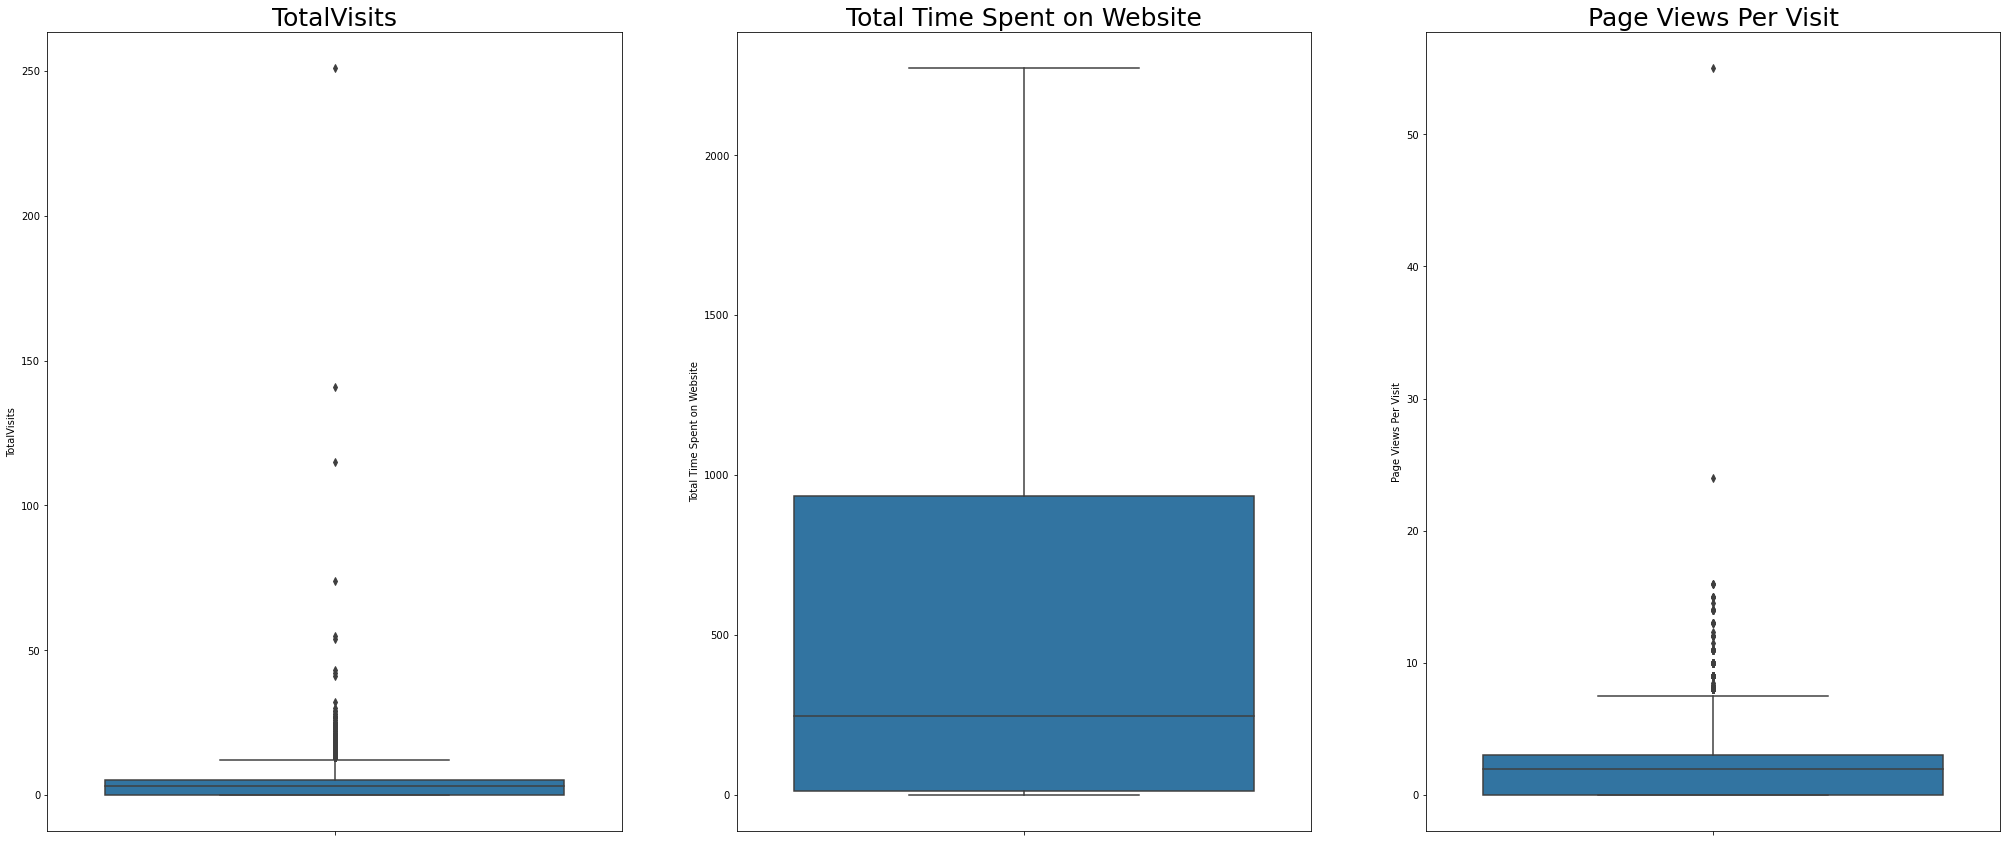

In [54]:
# setting figure size
plt.figure(figsize=(35,50))

# Title names for the columns in the dataset

col_title={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}

# Visualising the outliers with boxplot for all the variables 

for i in range(3):
    plt.subplot(3,3,i+1)
    plt.title(col_title[i],fontsize=25)
    sns.boxplot(y=leads[col_title[i]],data=leads)

In [55]:
# 1. dealing with 'TotalVisits' variable
# As we have range from 0 to 251 we will create buckets as per need

# creating labels
TotalVisits_labels = ['TotalVisits_0', 'TotalVisits_1_2','TotalVisits_3_4','TotalVisits_5_6','TotalVisits_7_8','TotalVisits_9_10',
       'TotalVisits_11_12','TotalVisits_12_15','TotalVisits_above_15']

# creating bins for TotalVisits__labels
leads['TotalVisits'] = pd.cut(leads['TotalVisits'], bins=[-1,0.0,2,4,6,8,10,12,15,251], labels = TotalVisits_labels)

In [56]:
leads.shape

(9240, 20)

In [57]:
leads['Page Views Per Visit'].value_counts()

0.00     2326
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
2.20        9
14.00       9
4.33        9
2.80        9
3.25        8
1.60        8
2.17        8
2.40        6
13.00       6
1.20        5
12.00       5
2.60        4
15.00       4
1.83        4
1.71        4
1.43        4
3.40        4
5.67        3
1.38        3
1.78        3
1.57        3
16.00       3
4.25        3
4.75        3
2.09        2
3.75        2
2.22        2
1.22        2
2.83        2
5.33        2
1.56        2
1.14        2
2.71        2
5.40        2
7.50        2
5.25        2
3.20        2
3.60        2
1.23        2
3.57        1
4.17        1
1.63  

In [58]:
# checking data set after creating bins

leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,TotalVisits_0,0,0.0,Page Visited on Website,Missing,Unemployed,0,0,0,0,0,0,Interested in other courses,0,Modified
1,API,Organic Search,0,0,0,TotalVisits_5_6,674,2.5,Email Opened,Missing,Unemployed,0,0,0,0,0,0,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,TotalVisits_1_2,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,TotalVisits_1_2,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,Ringing,0,Modified
4,Landing Page Submission,Google,0,0,1,TotalVisits_1_2,1428,1.0,Converted to Lead,Missing,Unemployed,0,0,0,0,0,0,Will revert after reading the email,0,Modified


#### After creating bins we removed the outliers and are now good to go. Before creating the dummy variables let's remove redundant columns/varaibles.

#### Also from above we know columns : 'Last Activity', 'Tags', 'Last Notable Activity' activity columns came from sales team, thus we will drop these redundant columns.

In [59]:
# dropping redundant column

red_list=['Last Activity', 'Tags', 'Last Notable Activity']

leads=leads.drop(red_list,axis=1)

leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0,TotalVisits_0,0,0.0,Missing,Unemployed,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,TotalVisits_5_6,674,2.5,Missing,Unemployed,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,TotalVisits_1_2,1532,2.0,Business Administration,Student,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,0,0,TotalVisits_1_2,305,1.0,Media and Advertising,Unemployed,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,TotalVisits_1_2,1428,1.0,Missing,Unemployed,0,0,0,0,0,0,0


In [60]:
leads.shape

(9240, 17)

In [61]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0,TotalVisits_0,0,0.0,Missing,Unemployed,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,TotalVisits_5_6,674,2.5,Missing,Unemployed,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,TotalVisits_1_2,1532,2.0,Business Administration,Student,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,0,0,TotalVisits_1_2,305,1.0,Media and Advertising,Unemployed,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,TotalVisits_1_2,1428,1.0,Missing,Unemployed,0,0,0,0,0,0,0


In [62]:
leads.shape

(9240, 17)

In [63]:
cat = ['Lead Origin', 'Lead Source','Specialization','What is your current occupation','TotalVisits','Page Views Per Visit']


In [64]:
leads['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [65]:
df5=leads.copy()

In [66]:
leads.shape

(9240, 17)

In [67]:
#Creating a dummy variables for 4 categories and dropping the first level. 

cat = ['Lead Origin', 'Lead Source','Specialization','What is your current occupation','TotalVisits','Page Views Per Visit']

#creating dummy variables data set
dummy = pd.get_dummies(leads[cat], drop_first=True)

# Adding these dummies to our original dataset
leads = pd.concat([leads,dummy],axis=1)

#dropping the duplicate columns
leads = leads.drop(cat, axis=1)

#viewing the dataset
leads.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,TotalVisits_TotalVisits_1_2,TotalVisits_TotalVisits_3_4,TotalVisits_TotalVisits_5_6,TotalVisits_TotalVisits_7_8,TotalVisits_TotalVisits_9_10,TotalVisits_TotalVisits_11_12,TotalVisits_TotalVisits_12_15,TotalVisits_TotalVisits_above_15
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,674,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,1,1532,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,0,0,0,305,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4,0,0,1,1428,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


In [68]:
leads.describe()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,TotalVisits_TotalVisits_1_2,TotalVisits_TotalVisits_3_4,TotalVisits_TotalVisits_5_6,TotalVisits_TotalVisits_7_8,TotalVisits_TotalVisits_9_10,TotalVisits_TotalVisits_11_12,TotalVisits_TotalVisits_12_15,TotalVisits_TotalVisits_above_15
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.000216,0.385390,487.698268,0.001515,0.000216,0.000108,0.000108,0.000433,0.000758,0.312554,0.528788,0.077706,0.005952,0.000108,0.314827,0.189935,0.124892,0.037338,0.057792,0.043615,0.006169,0.012121,0.105628,0.017208,0.012338,0.091775,0.039610,0.019264,0.090693,0.021970,0.365801,0.054437,0.010823,0.007900,0.004329,0.037771,0.021970,0.001082,0.291126,0.001732,0.022727,0.606061,0.076407,0.224567,0.262554,0.135173,0.057684,0.030087,0.014177,0.011039,0.012987
std,0.270435,0.014711,0.486714,548.021466,0.038898,0.014711,0.010403,0.010403,0.020803,0.027515,0.463559,0.499198,0.267722,0.076926,0.010403,0.464472,0.392271,0.330614,0.189598,0.233363,0.204247,0.078304,0.109433,0.307377,0.130052,0.110394,0.288724,0.195053,0.137459,0.287187,0.146592,0.481680,0.226891,0.103472,0.088537,0.065656,0.190651,0.146592,0.032882,0.454306,0.041579,0.149041,0.488648,0.265662,0.417320,0.440046,0.341927,0.233158,0.170835,0.118229,0.104491,0.113224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [69]:
leads.shape

(9240, 52)

#### Now all columns are converted to numerical data

#### # 4. Data Preparation

1. Split the dataset into train and test dataset and scaled the datasets.
2. After this, we plot a heatmap to check the correlations among the variables.
3. check heatmap for highly correlated features

In [70]:
# feature variables in "X" and target variable in "y" 

y=leads['Converted'] 
X=leads.drop('Converted',1)

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [71]:
X.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,TotalVisits_TotalVisits_1_2,TotalVisits_TotalVisits_3_4,TotalVisits_TotalVisits_5_6,TotalVisits_TotalVisits_7_8,TotalVisits_TotalVisits_9_10,TotalVisits_TotalVisits_11_12,TotalVisits_TotalVisits_12_15,TotalVisits_TotalVisits_above_15
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,674,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,1532,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,0,0,305,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4,0,0,1428,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


In [72]:
# Splitting the datset into train and test dataset in 70 :30 ratio

X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [73]:
#looking all the X, y train and test sets
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (6468, 51)
X_test: (2772, 51)
y_train: (6468,)
y_test: (2772,)


In [74]:
scaler=MinMaxScaler() 

In [75]:
leads.describe()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,TotalVisits_TotalVisits_1_2,TotalVisits_TotalVisits_3_4,TotalVisits_TotalVisits_5_6,TotalVisits_TotalVisits_7_8,TotalVisits_TotalVisits_9_10,TotalVisits_TotalVisits_11_12,TotalVisits_TotalVisits_12_15,TotalVisits_TotalVisits_above_15
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.000216,0.385390,487.698268,0.001515,0.000216,0.000108,0.000108,0.000433,0.000758,0.312554,0.528788,0.077706,0.005952,0.000108,0.314827,0.189935,0.124892,0.037338,0.057792,0.043615,0.006169,0.012121,0.105628,0.017208,0.012338,0.091775,0.039610,0.019264,0.090693,0.021970,0.365801,0.054437,0.010823,0.007900,0.004329,0.037771,0.021970,0.001082,0.291126,0.001732,0.022727,0.606061,0.076407,0.224567,0.262554,0.135173,0.057684,0.030087,0.014177,0.011039,0.012987
std,0.270435,0.014711,0.486714,548.021466,0.038898,0.014711,0.010403,0.010403,0.020803,0.027515,0.463559,0.499198,0.267722,0.076926,0.010403,0.464472,0.392271,0.330614,0.189598,0.233363,0.204247,0.078304,0.109433,0.307377,0.130052,0.110394,0.288724,0.195053,0.137459,0.287187,0.146592,0.481680,0.226891,0.103472,0.088537,0.065656,0.190651,0.146592,0.032882,0.454306,0.041579,0.149041,0.488648,0.265662,0.417320,0.440046,0.341927,0.233158,0.170835,0.118229,0.104491,0.113224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [76]:
# Fit On Data
num_vars = ['Total Time Spent on Website']

# For the Training Data Fit and Transform both need to done.
X_train[num_vars]=scaler.fit_transform(X_train[num_vars])

# View the Statistical Description to ensure MinMax Scaling has done properly
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Do Not Email,6468.0,0.078386,0.268799,0.0,0.000000,0.000000,0.00000,1.0
Do Not Call,6468.0,0.000309,0.017583,0.0,0.000000,0.000000,0.00000,1.0
Total Time Spent on Website,6468.0,0.212974,0.240566,0.0,0.005282,0.108275,0.40779,1.0
Search,6468.0,0.001701,0.041207,0.0,0.000000,0.000000,0.00000,1.0
Newspaper Article,6468.0,0.000309,0.017583,0.0,0.000000,0.000000,0.00000,1.0
X Education Forums,6468.0,0.000155,0.012434,0.0,0.000000,0.000000,0.00000,1.0
Newspaper,6468.0,0.000155,0.012434,0.0,0.000000,0.000000,0.00000,1.0
Digital Advertisement,6468.0,0.000464,0.021533,0.0,0.000000,0.000000,0.00000,1.0
Through Recommendations,6468.0,0.001082,0.032882,0.0,0.000000,0.000000,0.00000,1.0
A free copy of Mastering The Interview,6468.0,0.311843,0.463282,0.0,0.000000,0.000000,1.00000,1.0


In [77]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

print('Current Conversion Rate:',round((sum(y)/len(y.index))*100,2))

Current Conversion Rate: 38.54


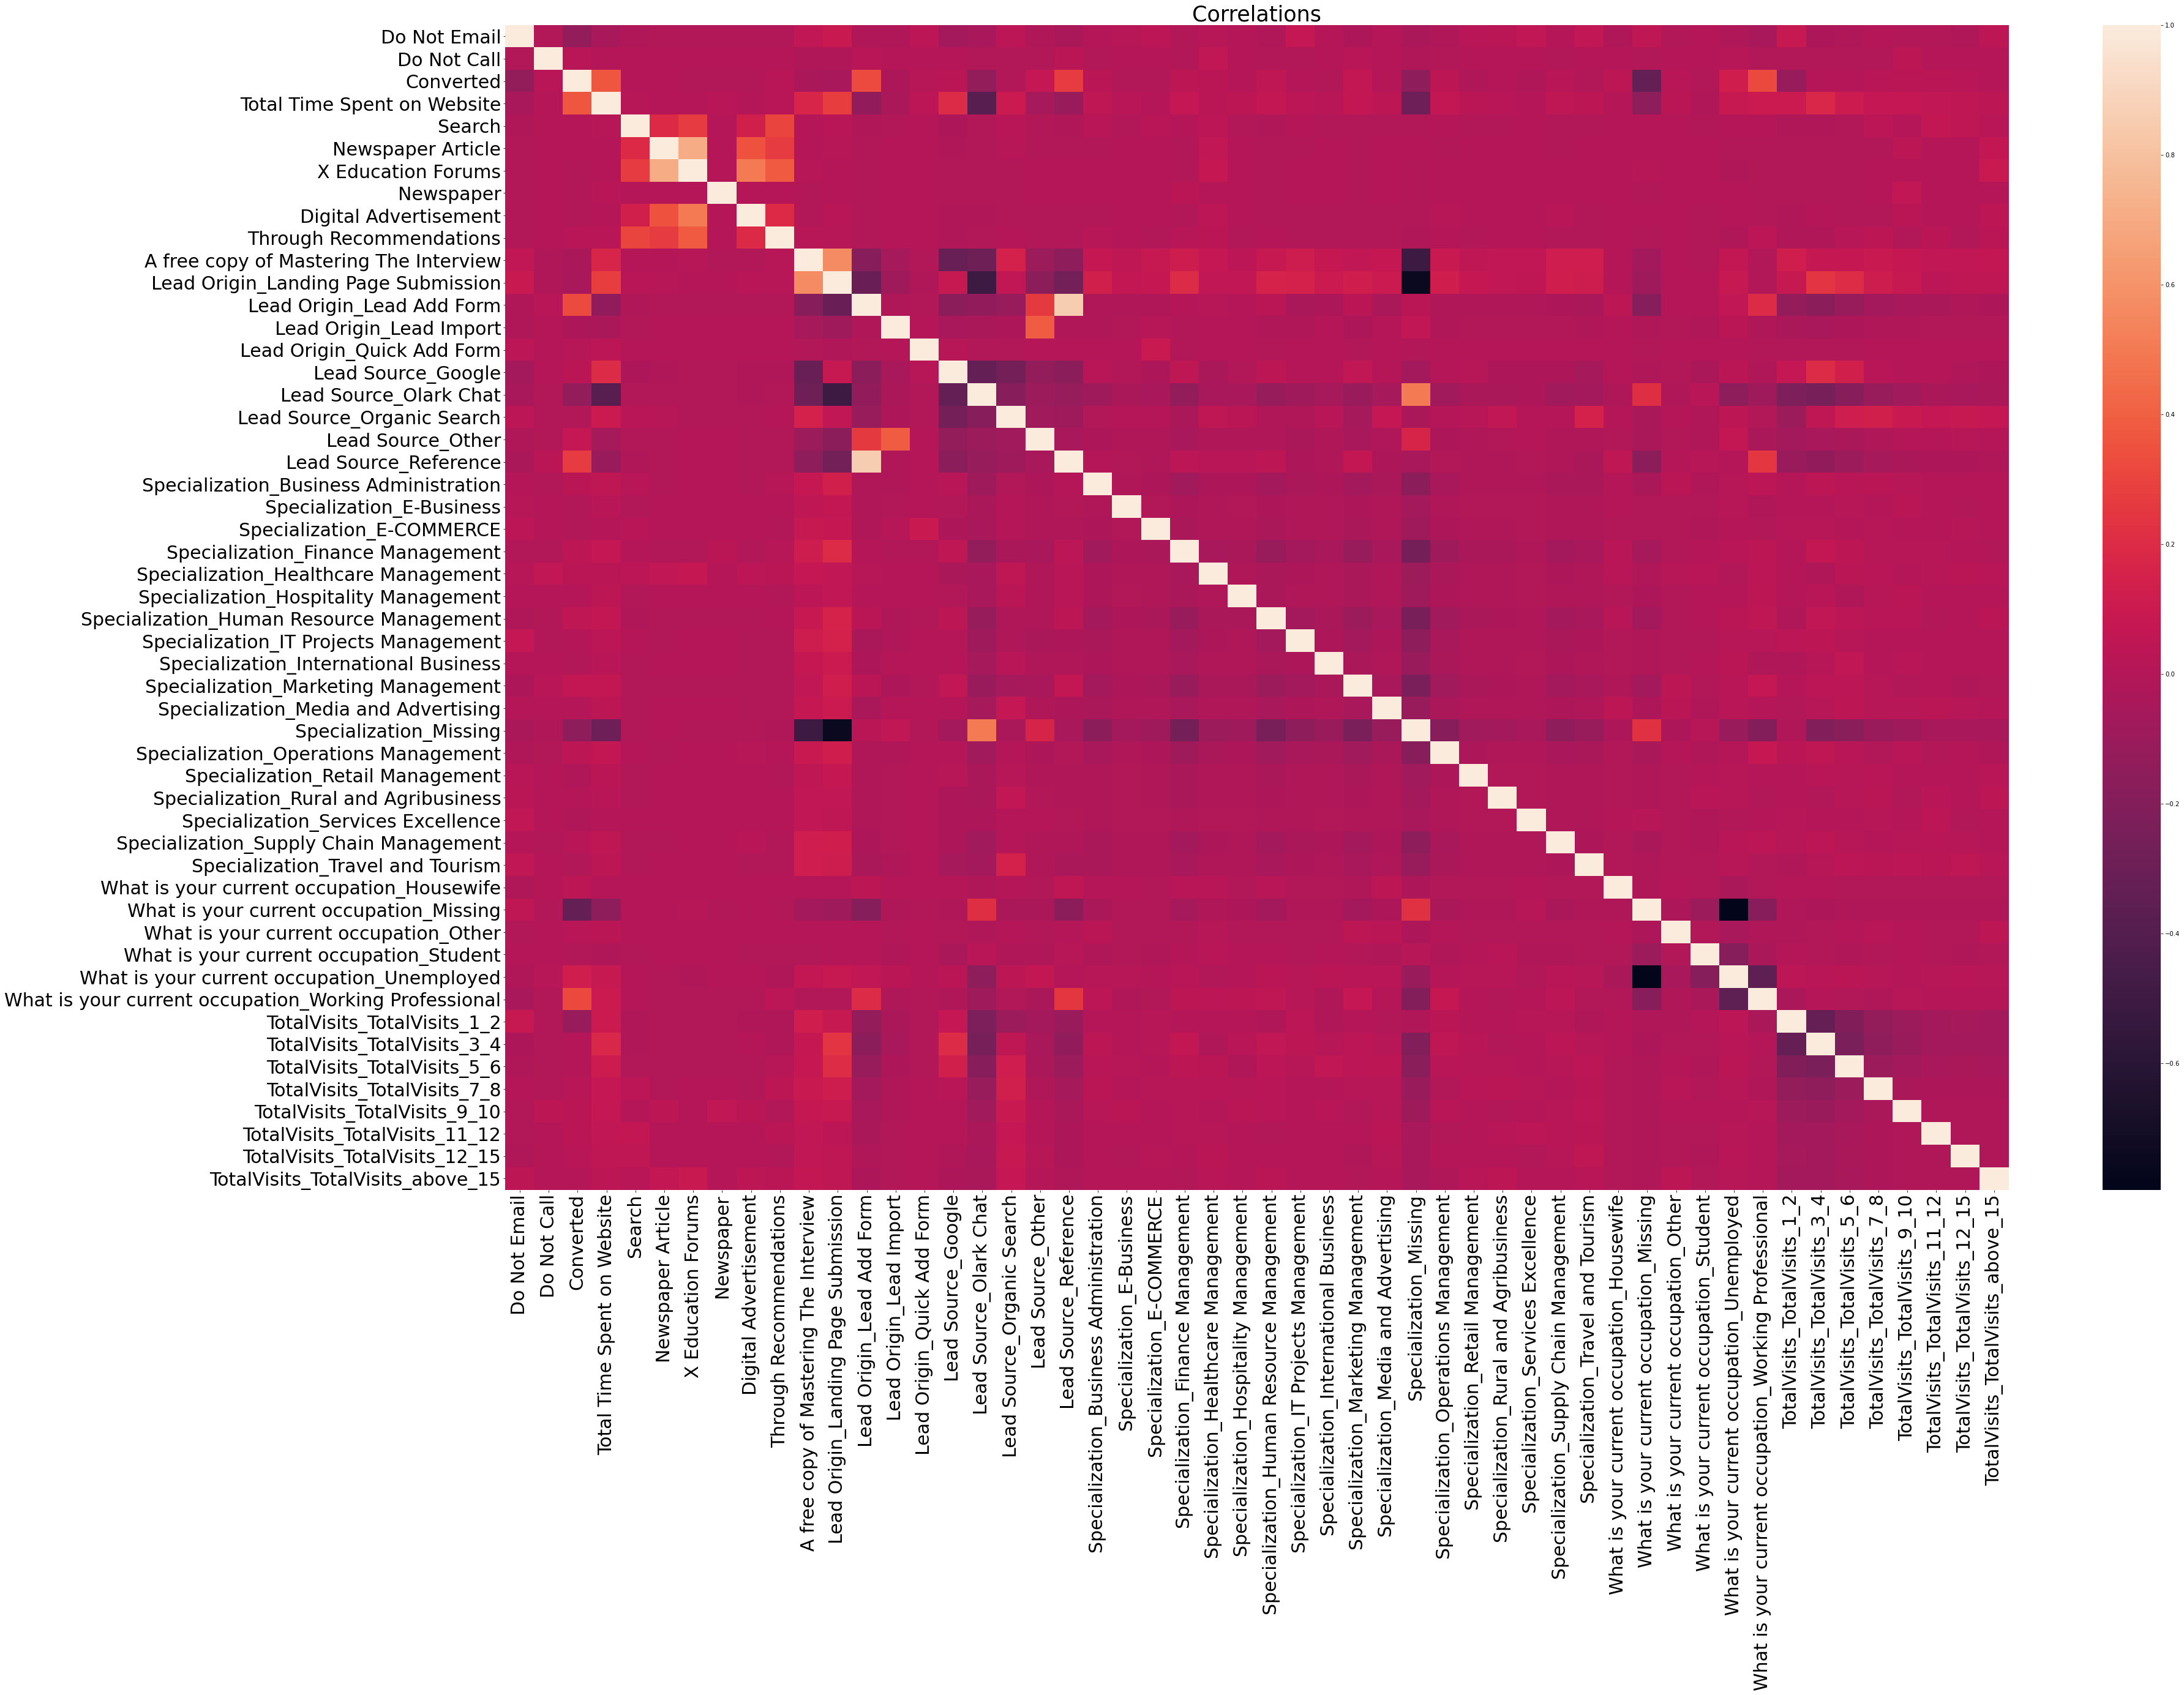

In [78]:
# setting the figure size
plt.figure(figsize=(55,35))

# Plotting a heatmap

sns.heatmap(leads.corr())
plt.title('Correlations', fontsize =35)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.show()

In [79]:
leads_num = leads.select_dtypes(include='number')
leads.shape

(9240, 52)

In [80]:
plt.figure(figsize = (12,6))
cor=leads.corr()
cor

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,TotalVisits_TotalVisits_1_2,TotalVisits_TotalVisits_3_4,TotalVisits_TotalVisits_5_6,TotalVisits_TotalVisits_7_8,TotalVisits_TotalVisits_9_10,TotalVisits_TotalVisits_11_12,TotalVisits_TotalVisits_12_15,TotalVisits_TotalVisits_above_15
Do Not Email,1.000000,-0.004322,-0.135580,-0.046374,-0.011443,-0.004322,-0.003056,-0.003056,-0.006113,-0.008088,0.055762,0.095304,-0.020983,-0.017529,0.035416,-0.062113,-0.051436,0.034295,-0.011411,-0.038451,0.003893,0.012636,0.033293,-0.004597,0.013447,0.010674,-0.019910,0.069613,0.005416,-0.027271,-0.000343,-0.037805,-0.014036,0.023426,0.028032,0.053781,0.002680,0.059722,-0.009669,0.049611,-0.002609,0.006225,-0.019533,-0.049841,0.082640,-0.026117,-0.009618,-0.000584,-0.007224,-0.004761,-0.011884,0.044071
Do Not Call,-0.004322,1.000000,0.018581,0.006801,-0.000573,-0.000216,-0.000153,-0.000153,-0.000306,-0.000405,-0.009921,-0.015587,0.023210,-0.001139,-0.000153,0.005866,-0.007125,-0.005559,-0.002898,0.027883,-0.003142,-0.001159,-0.001630,-0.005057,0.054625,-0.001645,-0.004677,-0.002988,-0.002062,0.020972,-0.002205,-0.011175,-0.003530,-0.001539,-0.001313,-0.000970,-0.002915,-0.002205,-0.000484,-0.009429,-0.000613,-0.002244,0.011863,-0.004232,-0.007918,-0.008780,-0.005817,-0.003640,0.040475,-0.001765,-0.001555,-0.001688
Converted,-0.135580,0.018581,1.000000,0.362483,-0.002261,0.003465,-0.008238,-0.008238,-0.005789,0.018607,-0.039820,-0.051236,0.321702,-0.023695,0.013138,0.026286,-0.129459,-0.005879,0.070423,0.270830,0.025791,-0.002747,-0.006429,0.043308,0.030306,0.008190,0.047130,-0.001200,-0.007441,0.065853,0.010264,-0.154025,0.043272,-0.009755,0.007200,-0.014956,0.019245,-0.009457,0.041567,-0.326349,0.020505,-0.004375,0.128710,0.313837,-0.108007,-0.000483,0.008226,0.018682,0.029760,0.029181,0.024880,0.003444
Total Time Spent on Website,-0.046374,0.006801,0.362483,1.000000,0.012654,0.011326,0.006195,0.025142,0.007607,0.023186,0.168298,0.276009,-0.139681,-0.034926,0.032831,0.199839,-0.376768,0.096123,-0.058654,-0.107361,0.053244,0.018988,0.001162,0.074260,0.027873,0.039611,0.063852,0.032481,0.022154,0.067445,0.040589,-0.287133,0.060720,0.027458,0.020672,0.002900,0.049050,0.042640,0.007088,-0.150718,0.028115,-0.012518,0.086366,0.099241,0.100487,0.173637,0.103888,0.070965,0.073662,0.055316,0.046660,0.044396
Search,-0.011443,-0.000573,-0.002261,0.012654,1.000000,0.188573,0.267073,-0.000405,0.132950,0.302318,-0.002256,0.020050,-0.011307,-0.003014,-0.000405,-0.026405,-0.004675,0.018950,-0.007672,-0.009648,0.018929,-0.003069,0.021113,0.004718,0.037638,-0.004354,-0.012383,0.006355,-0.005460,-0.002613,-0.005838,-0.006477,0.002917,-0.004075,-0.003476,-0.002569,-0.007718,-0.005838,-0.001282,-0.000464,-0.001622,-0.005941,0.00

<Figure size 864x432 with 0 Axes>

In [81]:
matrix=np.triu(cor)
matrix

array([[ 1.        , -0.00432226, -0.13558034, ..., -0.00476059,
        -0.01188396,  0.04407108],
       [ 0.        ,  1.        ,  0.01858129, ..., -0.00176452,
        -0.00155454, -0.00168779],
       [ 0.        ,  0.        ,  1.        , ...,  0.02918111,
         0.0248799 ,  0.00344354],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.01266995, -0.01375604],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        , -0.01211903],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

<AxesSubplot:>

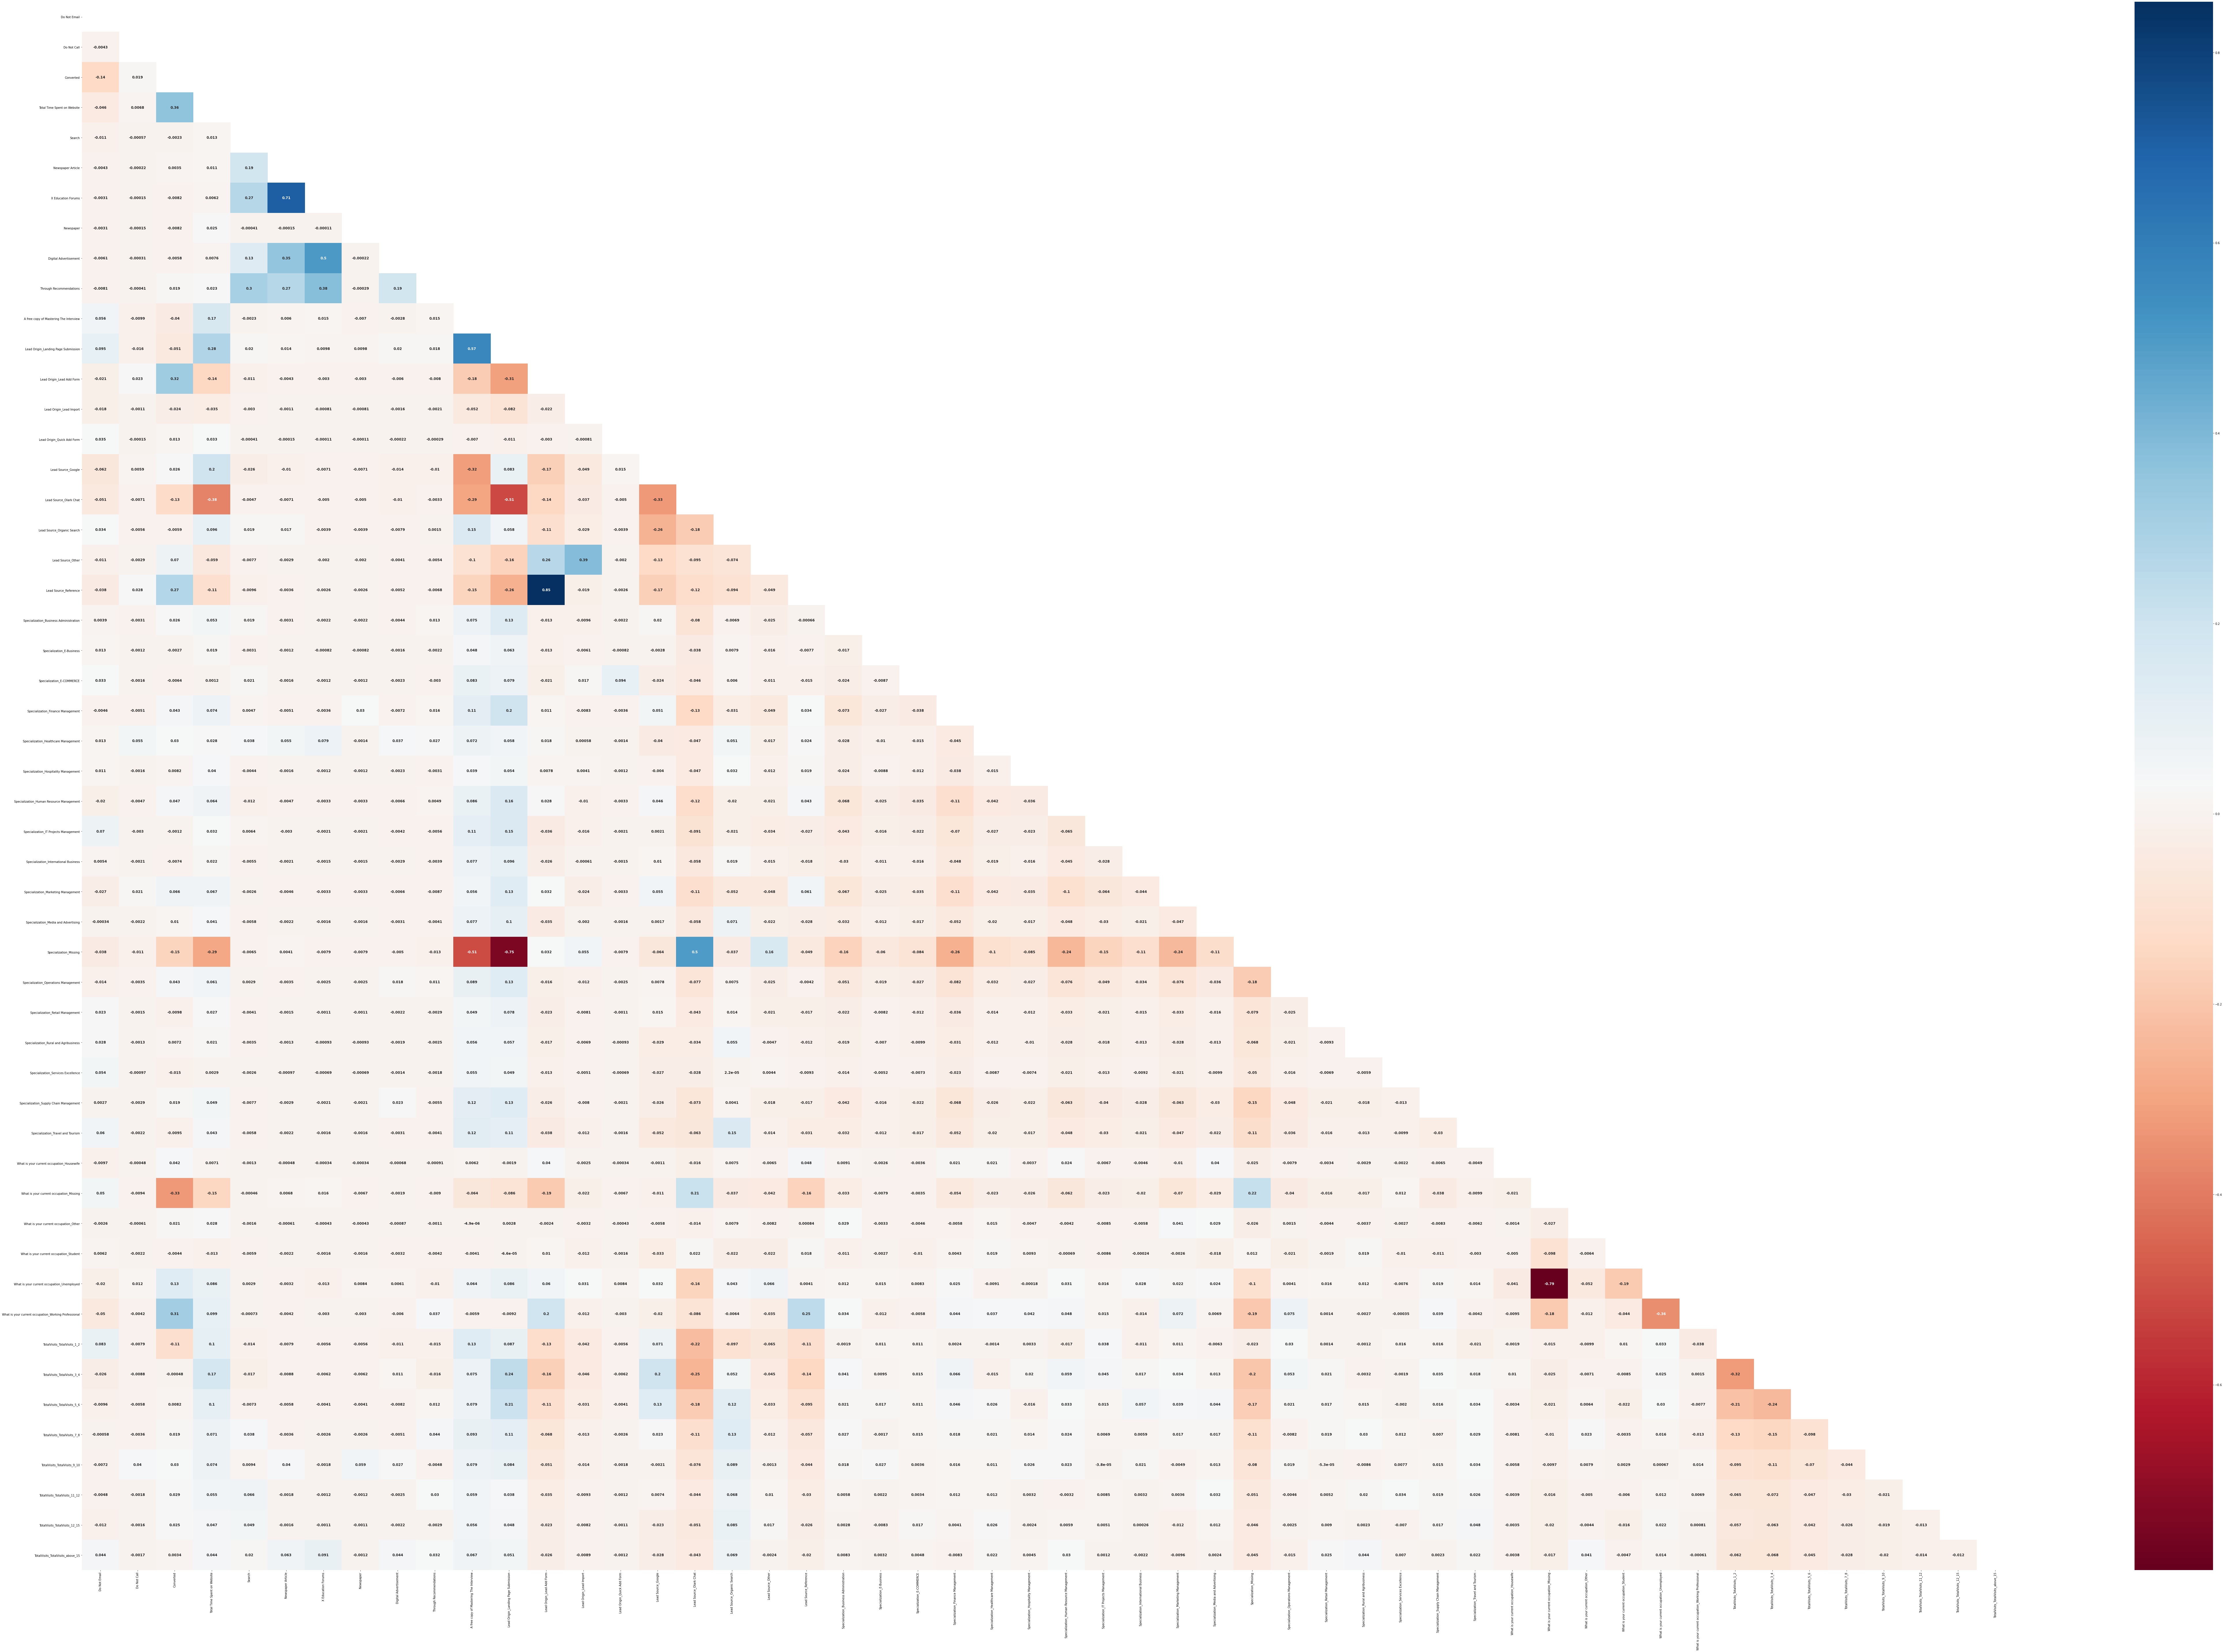

In [82]:

plt.subplots(figsize=(150,100))
sns.heatmap(cor,cmap='RdBu',annot=True,mask=matrix,annot_kws={'fontsize':12,'fontweight':'bold'})

#### All are light shaded which indicates that there is less correlation between features two are deep colors but correlated values are less than 1 so there is no need to drop features on the basis of correlation

In [83]:
# creating an object

logreg = LogisticRegression() 

In [84]:
# RFE model with 15 variables
rfe = RFE(logreg,15) 

# fitting the model
rfe = rfe.fit(X_train,y_train)  

In [85]:
#listing which all columns are selected(True) by RFE and which all are rejected(False)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 24),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 33),
 ('Newspaper Article', False, 12),
 ('X Education Forums', False, 15),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 9),
 ('Through Recommendations', False, 23),
 ('A free copy of Mastering The Interview', False, 22),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 35),
 ('Lead Source_Google', False, 14),
 ('Lead Source_Olark Chat', False, 37),
 ('Lead Source_Organic Search', False, 36),
 ('Lead Source_Other', False, 27),
 ('Lead Source_Reference', True, 1),
 ('Specialization_Business Administration', False, 18),
 ('Specialization_E-Business', False, 31),
 ('Specialization_E-COMMERCE', False, 13),
 ('Specialization_Finance Management', False, 28),
 ('Specialization_Healthcare Management', False, 25),
 ('Specialization_Hospitality M

In [86]:
# storing selected(True) columns by RFE in a list
rfe_col = X_train.columns[rfe.support_]

# listing features removed by RFE feature selection
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview', 'Lead Origin_Quick Add Form', 'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Other', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_Finance Management', 'Specialization_Healthcare Management', 'Specialization_Human Resource Management', 'Specialization_IT Projects Management', 'Specialization_International Business', 'Specialization_Marketing Management', 'Specialization_Media and Advertising', 'Specialization_Operations Management', 'Specialization_Retail Management', 'Specialization_Rural and Agribusiness', 'Specialization_Services Excellence', 'Specialization_Supply Chain Management', 'Specialization_Travel and Tourism', 'What is your current occupation_Student',
       'What is your current occupation_Une

In [87]:
# Creating new train dataframe with RFE selected features

X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

,Do Not Email,Total Time Spent on Website,Newspaper,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Reference,Specialization_Hospitality Management,Specialization_Missing,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Working Professional,TotalVisits_TotalVisits_1_2,TotalVisits_TotalVisits_3_4
1871,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0
6795,0,0.214349,0,1,0,0,0,0,1,0,0,0,0,0,1
3516,0,0.046655,0,0,0,0,0,0,1,0,0,0,0,0,0
8105,0,0.541373,0,1,0,0,0,0,0,0,0,0,0,0,0
3934,0,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0


#### First Model

In [88]:
# creating 1st model

# Adding a constant
X_train_1=sm.add_constant(X_train_rfe)

# creating a model and fitting it.

logr1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial()).fit()   # Using GLM for creating model and fitting it
logr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2845.8
Date:                Wed, 16 Oct 2024   Deviance:                       5691.6
Time:                        23:55:28   Pearson chi2:                 7.88e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2196      0.115     -1.904      0.057      -0.446       0.006
Do Not Email                                            -1.2903      0.162     -7.954      0.000      -1.608      -0.972
Total Time Spent on Website                              4.3467      0.152     28.522      0.000       4.048       4.645
Newspaper                                              -24.7125   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Origin_Landing Page Submission                     -1.1006      0.116     -9.514      0.000      -1.327      -0.874
Lead Origin_Lead Add Form                                3.6855      0.363     10.159      0.000       2.974       4.397
Lead Origin_Lead Import                                 -1.1992      0.527     -2.276      0.023      -2.232      -0.167
Lead Source_Reference                                   -1.2171      0.407     -2.989      0.003      -2.015      -0.419
Specialization_Hospitality Management                   -0.9507      0.319     -2.977      0.003      -1.577      -0.325
Specialization_Missing                                  -0.8935      0.118     -7.568      0.000      -1.125      -0.662
What is your current occupation_Housewife               22.4274   1.35e+04      0.002      0.999   -2.63e+04    2.64e+04
What is your current occupation_Missing                 -1.1661      0.083    -14.007      0.000      -1.329      -1.003
What is your current occupation_Other                   -1.1328      0.790     -1.434      0.152      -2.681       0.416
What is your current occupation_Working Professional     2.4336      0.185     13.190      0.000       2.072       2.795
TotalVisits_TotalVisits_1_2                             -0.8177      0.089     -9.165      0.000      -0.993      -0.643
TotalVisits_TotalVisits_3_4                             -0.4828      0.082     -5.856      0.000      -0.644      -0.321
========================================================================================================================
"""

#### Now, From the above summary presented there are some features having high p -values, we will drop features having insignificant values one by one and create new models until all the features attain significant p-value<0.05 and vif-values < 4.

In [89]:
#### Calculating VIF

In [90]:
# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X_train_rfe[rfe_col].columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X_train_rfe[rfe_col].values,i) for i in range(X_train_rfe[rfe_col].shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)
vif   # Viewing the dataset

,Features,VIF
4,Lead Origin_Lead Add Form,4.41
6,Lead Source_Reference,4.34
3,Lead Origin_Landing Page Submission,2.49
1,Total Time Spent on Website,1.96
8,Specialization_Missing,1.70
14,TotalVisits_TotalVisits_3_4,1.66
10,What is your current occupation_Missing,1.55
13,TotalVisits_TotalVisits_1_2,1.52
12,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.11


**Model 2**

- for this we are dropping 'const','What is your current occupation_Housewife' due to high p-value

In [91]:
# Dropping the most insignificant values 'What is your current occupation_Housewife' and constant

X_train_rfe2 = X_train_1.drop(['const','What is your current occupation_Housewife'],1)

# Creating a new model 2

X_train_2=sm.add_constant(X_train_rfe2)                                 # Adding constant
logr2=sm.GLM(y_train,X_train_2,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr2.summary()                                                         #viewing summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2851.2
Date:                Wed, 16 Oct 2024   Deviance:                       5702.3
Time:                        23:55:29   Pearson chi2:                 7.90e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2178      0.115     -1.889      0.059      -0.444       0.008
Do Not Email                                            -1.2944      0.162     -7.981      0.000      -1.612      -0.977
Total Time Spent on Website                              4.3410      0.152     28.513      0.000       4.043       4.639
Newspaper                                              -22.7123   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Landing Page Submission                     -1.0981      0.116     -9.496      0.000      -1.325      -0.871
Lead Origin_Lead Add Form                                3.6878      0.363     10.164      0.000       2.977       4.399
Lead Origin_Lead Import                                 -1.1973      0.527     -2.273      0.023      -2.230      -0.165
Lead Source_Reference                                   -1.2044      0.407     -2.958      0.003      -2.002      -0.406
Specialization_Hospitality Management                   -0.9564      0.319     -2.994      0.003      -1.582      -0.330
Specialization_Missing                                  -0.8966      0.118     -7.596      0.000      -1.128      -0.665
What is your current occupation_Missing                 -1.1690      0.083    -14.047      0.000      -1.332      -1.006
What is your current occupation_Other                   -1.1352      0.790     -1.437      0.151      -2.683       0.413
What is your current occupation_Working Professional     2.4270      0.184     13.156      0.000       2.065       2.789
TotalVisits_TotalVisits_1_2                             -0.8130      0.089     -9.128      0.000      -0.988      -0.638
TotalVisits_TotalVisits_3_4                             -0.4742      0.082     -5.761      0.000      -0.635      -0.313
========================================================================================================================
"""

In [92]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe2.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe2.values,i) for i in range(X_train_rfe2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,4.41
6,Lead Source_Reference,4.34
3,Lead Origin_Landing Page Submission,2.49
1,Total Time Spent on Website,1.96
8,Specialization_Missing,1.70
13,TotalVisits_TotalVisits_3_4,1.66
9,What is your current occupation_Missing,1.55
12,TotalVisits_TotalVisits_1_2,1.52
11,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.11


**Model 3**

- for this we are dropping 'const','Specialization_Missing' as this is has no information.

In [93]:
# Dropping the most insignificant values 'Specialization_Missing' and constant

X_train_rfe3 = X_train_2.drop(['const','Specialization_Missing'],1)

# Creating a new model 3

X_train_3=sm.add_constant(X_train_rfe3)                                 # Adding constant
logr3=sm.GLM(y_train,X_train_3,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr3.summary()                                                         #viewing summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2880.6
Date:                Wed, 16 Oct 2024   Deviance:                       5761.1
Time:                        23:55:29   Pearson chi2:                 7.49e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9337      0.066    -14.065      0.000      -1.064      -0.804
Do Not Email                                            -1.3015      0.161     -8.060      0.000      -1.618      -0.985
Total Time Spent on Website                              4.4399      0.152     29.238      0.000       4.142       4.738
Newspaper                                              -22.7478   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Landing Page Submission                     -0.4255      0.073     -5.864      0.000      -0.568      -0.283
Lead Origin_Lead Add Form                                3.5878      0.361      9.936      0.000       2.880       4.296
Lead Origin_Lead Import                                 -1.0999      0.519     -2.118      0.034      -2.118      -0.082
Lead Source_Reference                                   -0.8058      0.402     -2.004      0.045      -1.594      -0.018
Specialization_Hospitality Management                   -0.8345      0.315     -2.652      0.008      -1.451      -0.218
What is your current occupation_Missing                 -1.2448      0.082    -15.109      0.000      -1.406      -1.083
What is your current occupation_Other                   -0.9602      0.762     -1.260      0.208      -2.453       0.533
What is your current occupation_Working Professional     2.5617      0.181     14.126      0.000       2.206       2.917
TotalVisits_TotalVisits_1_2                             -0.8332      0.089     -9.387      0.000      -1.007      -0.659
TotalVisits_TotalVisits_3_4                             -0.4584      0.082     -5.586      0.000      -0.619      -0.298
========================================================================================================================
"""

In [94]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe3.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe3.values,i) for i in range(X_train_rfe3.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
6,Lead Source_Reference,4.25
4,Lead Origin_Lead Add Form,4.17
3,Lead Origin_Landing Page Submission,2.14
1,Total Time Spent on Website,1.89
12,TotalVisits_TotalVisits_3_4,1.60
11,TotalVisits_TotalVisits_1_2,1.41
8,What is your current occupation_Missing,1.20
10,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.11
7,Specialization_Hospitality Management,1.02


#### If VIF is above 5 then it is problematic so all is below 5 means all is ok and we can go for prediction with this model

In [95]:
# checking all the coefficients
logr2.params.sort_values(ascending=False)

Total Time Spent on Website                              4.341013
Lead Origin_Lead Add Form                                3.687844
What is your current occupation_Working Professional     2.426980
const                                                   -0.217833
TotalVisits_TotalVisits_3_4                             -0.474162
TotalVisits_TotalVisits_1_2                             -0.813031
Specialization_Missing                                  -0.896606
Specialization_Hospitality Management                   -0.956382
Lead Origin_Landing Page Submission                     -1.098055
What is your current occupation_Other                   -1.135170
What is your current occupation_Missing                 -1.168988
Lead Origin_Lead Import                                 -1.197272
Lead Source_Reference                                   -1.204420
Do Not Email                                            -1.294396
Newspaper                                              -22.712291
dtype: flo

In [96]:
#predicting train dataset with final model

y_train_pred=logr3.predict(X_train_3)

# Creating a new dataset and saving predicted values in it

y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred,'ID':y_train.index})
y_train_pred_final['Predicted']=y_train_pred_final.Converted_probability.map(lambda x:1 if x >.5 else 0)
y_train_pred_final.head()   # viewing first 5 rows

,Converted,Converted_probability,ID,Predicted
1871,0,0.282165,1871,0
6795,0,0.296101,6795,0
3516,0,0.325940,3516,0
8105,0,0.739701,8105,1
3934,0,0.282165,3934,0


In [97]:
from sklearn import metrics

In [98]:
# Create confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3597  405]
 [ 853 1613]]


In [99]:

# Calculate accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8055040197897341


#### Here we have the accuracy of approximately 81% which is good enough to move further

### ROC Curve Plotting
#### - ROC curve shows the trade off between True postive rate and False positive rate - means if sensitivity increases specificity will decrease.
#### - The curve closer to the left side border then right side of the border is more accurate.
#### - The curve closer to the 45-degree diagonal of the ROC space is less accurate.

In [101]:
# Creating a function to plot roc curve with auc score
def draw_roc(actual, probability):
    
    # Creating roc curve to get true positive rate, false positive rate and threshold
    fpr, tpr, thresholds = roc_curve( actual, probability,drop_intermediate = False )   
    
    # Calculating the auc score(area under the curve)
    auc_score = roc_auc_score( actual, probability )    
    
    # Setting the figure size    
    plt.figure(figsize=(15,10))
    
    # Plotting the roc curve    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    # Plotting the 45% dotted line 
    plt.plot([0, 1], [0, 1], 'r--')
    
    # Setting the x axis limit    
    plt.xlim([0.0, 1.0])
    
    # Setting the y axis limit   
    plt.ylim([0.0, 1.05])
    
    # Setting the x axis label
    plt.xlabel('False Positive Rate')
    
    # Setting the y axis label    
    plt.ylabel('True Positive Rate')
    
    # Setting the title    
    plt.title('Receiver operating characteristic')
    
    # Setting the legend on the left below to show the value of auc    
    plt.legend(loc="lower right")
    
    # Showing the plot   
    plt.show()

    return None   # no return

In [102]:
# creating 10 points of probabilities to find the optimal point cutoff

numbers=[float(x)/10 for x in range(10)]  # from 0 to 0.9 with set size 0.1

for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Converted_probability'].map(lambda x:1 if x > i else 0)   #  Mapping the probablities for each 10 points
y_train_pred_final.head()   # Viewing the first 5 rows

,Converted,Converted_probability,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.282165,1871,0,1,1,1,0,0,0,0,0,0,0
6795,0,0.296101,6795,0,1,1,1,0,0,0,0,0,0,0
3516,0,0.325940,3516,0,1,1,1,1,0,0,0,0,0,0
8105,0,0.739701,8105,1,1,1,1,1,1,1,1,1,0,0
3934,0,0.282165,3934,0,1,1,1,0,0,0,0,0,0,0


## **Accuracy, Sensitivity, Specificity** 

In [104]:
df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# from 0 to 0.9 with set size 0.1

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])  # creating confusion matrix 
    total=sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data 
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          # Inserting all the data into the dataframe created earlier
print(df_cutoffs)   # Printing the data

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.381262    1.000000     0.000000
0.1          0.1  0.508813    0.979724     0.218641
0.2          0.2  0.685838    0.909165     0.548226
0.3          0.3  0.778912    0.763585     0.788356
0.4          0.4  0.804731    0.707624     0.864568
0.5          0.5  0.805504    0.654096     0.898801
0.6          0.6  0.794836    0.590430     0.920790
0.7          0.7  0.772418    0.493917     0.944028
0.8          0.8  0.743352    0.377129     0.969015
0.9          0.9  0.697434    0.216951     0.993503


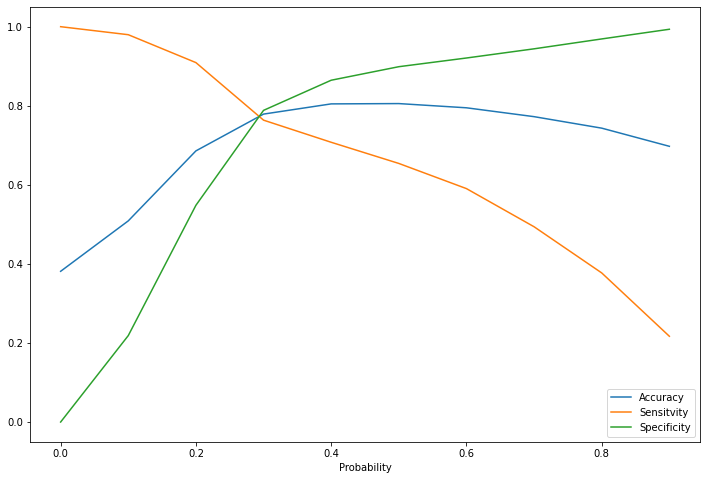

In [105]:
# Ploting 'Accuracy' , 'Sensitivity' and 'Specificity' for various probabilities(0.0 to 0.9).

df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'], figsize=(12,8))   # line plotting
plt.show()

In [106]:
# Predicting the outcomes with probability cutoff as 0.3 by creating new columns in the final dataset

y_train_pred_final['Predicted']=y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.3 else 0 )  # Predicted value 

y_train_pred_final.head()

,Converted,Converted_probability,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.282165,1871,0,1,1,1,0,0,0,0,0,0,0
6795,0,0.296101,6795,0,1,1,1,0,0,0,0,0,0,0
3516,0,0.325940,3516,1,1,1,1,1,0,0,0,0,0,0
8105,0,0.739701,8105,1,1,1,1,1,1,1,1,1,0,0
3934,0,0.282165,3934,0,1,1,1,0,0,0,0,0,0,0


In [107]:
# Creating confusion matrix to find all the metrics

confusion_pr_train=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion_pr_train

array([[3155,  847],
       [ 583, 1883]], dtype=int64)

In [111]:
#Sensitivity score
sen_train =round((confusion_pr_train[1,1]/(confusion_pr_train[1,0]+confusion_pr_train[1,1])*100),2)  

#specificity score
spec_train =round((confusion_pr_train[0,0]/(confusion_pr_train[0,0]+confusion_pr_train[0,1])*100),2)  

print('Sensitivity:',sen_train)  
print('Specificity:',spec_train) 

Sensitivity: 76.36
Specificity: 78.84


In [110]:
#  Precision and Recall score
p_train = round((confusion_pr_train[1,1]/(confusion_pr_train[0,1]+confusion_pr_train[1,1])*100),2)

#  Recall score
r_train = round((confusion_pr_train[1,1]/(confusion_pr_train[1,0]+confusion_pr_train[1,1])*100),2)

print('Precision:',p_train) 
print('Recall:',r_train)  

Precision: 68.97
Recall: 76.36


In [112]:
# Checking accuracy for train dataset 
Accuracy_train = round(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)*100,2)
print('Train set Accuracy:',Accuracy_train)

Train set Accuracy: 77.89


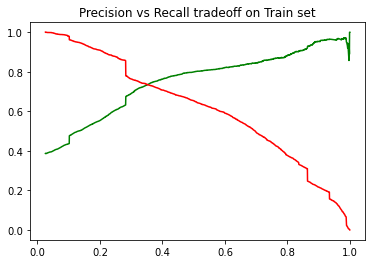

In [114]:
# Creating precision recall curve by creating three points and plotting

p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff on Train set')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

In [115]:
X_test[['Total Time Spent on Website']]=scaler.transform(X_test[['Total Time Spent on Website']])

In [116]:
# Predicting the test dataset with our final model

test_cols=X_train_3.columns[1:]              # Taking the same column train set has
X_test_final=X_test[test_cols]               # Updating it in the final test set
X_test_final=sm.add_constant(X_test_final)   # Adding constant to the final set set
y_pred_test=logr3.predict(X_test_final)      # Predicting the final test set

In [117]:
# Creating a new dataset and saving the prediction values in it

y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})

y_test_pred_final.head()   # viewing first 5 rows

,Converted,Converted_Probability,ID
4269,1,0.449452,4269
2376,1,0.863916,2376
7766,1,0.851093,7766
9199,0,0.282165,9199
4359,1,0.863916,4359


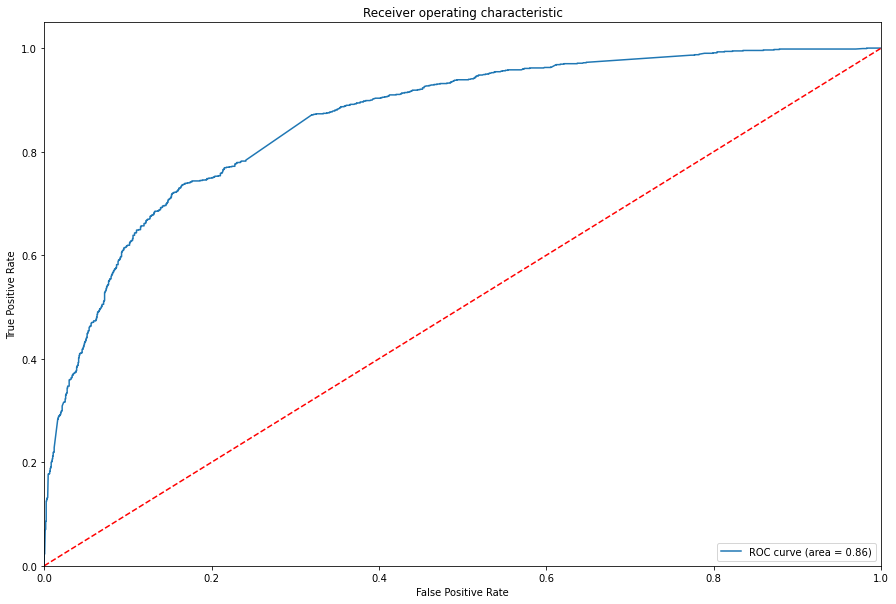

In [118]:
# Calling the roc curve function for plotting

draw_roc(y_test_pred_final.Converted, y_test_pred_final.Converted_Probability)

In [119]:
# Predicting the outcomes with probability cutoff as 0.3 by creating new columns in the final test dataset

y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.3 else 0 )  # Predicted value 

y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
4269,1,0.449452,4269,1
2376,1,0.863916,2376,1
7766,1,0.851093,7766,1
9199,0,0.282165,9199,0
4359,1,0.863916,4359,1


In [120]:
# Creating confusion matrix to find precision and recall score

confusion_pr_test=confusion_matrix(y_test_pred_final.Converted,y_test_pred_final.Predicted)
confusion_pr_test

array([[1301,  376],
       [ 251,  844]], dtype=int64)

In [132]:
p_test = round((confusion_pr_test[1,1]/(confusion_pr_test[0,1]+confusion_pr_test[1,1])*100),2)

#  Recall score
r_test = round((confusion_pr_test[1,1]/(confusion_pr_test[1,0]+confusion_pr_test[1,1])*100),2)

#print both
print('Precision:',p_test) 
print('Recall:',r_test)     

Precision: 69.18
Recall: 77.08


In [123]:
#Sensitivity score
sen_test =round((confusion_pr_test[1,1]/(confusion_pr_test[1,0]+confusion_pr_test[1,1])*100),2)  

#specificity score
spec_test =round((confusion_pr_test[0,0]/(confusion_pr_test[0,0]+confusion_pr_test[0,1])*100),2)  

#print both
print('Sensitivity:',sen_test)   
print('Specificity:',spec_test) 

Sensitivity: 77.08
Specificity: 77.58


In [125]:
# Checking test set accuracy

acc_test = round(metrics.accuracy_score(y_test_pred_final.Converted,y_test_pred_final.Predicted)*100,2)
print('Test set Accuracy:',acc_test)

Test set Accuracy: 77.38


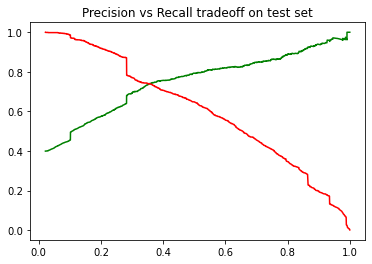

In [126]:
# Creating precision recall curve by creating three points and plotting

p ,r, thresholds=precision_recall_curve(y_test_pred_final.Converted, y_test_pred_final.Converted_Probability)
plt.title('Precision vs Recall tradeoff on test set')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

In [128]:
print('F1_Score: ',f1_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)*100)

F1_Score:  72.9157667386609


In [133]:
print('Train Data Set metrics:')
print()
print('Sensitivity:',Sensitivity_train)   
print('Specificity:',Specificity_train)
print('Precision:',Precision_train) 
print('Recall:',Recall_train)
print('Accuracy:',Accuracy_train)
print()
print('Test Data Set metrics:')
print()
print('Sensitivity:',sen_test)   
print('Specificity:',spec_test)
print('Precision:',p_test) 
print('Recall:',r_test)
print('Accuracy:',acc_test)

Train Data Set metrics:

Sensitivity: 76.36
Specificity: 78.84
Precision: 68.97
Recall: 76.36
Accuracy: 77.89

Test Data Set metrics:

Sensitivity: 77.08
Specificity: 77.58
Precision: 69.18
Recall: 77.08
Accuracy: 77.38


In [134]:
# Creating new columns for lead number and lead score
# lead score indicates higher score are hotter the leads and lower score are colder the leads.

y_test_pred_final['Lead Number']=leads.iloc[y_test_pred_final['ID'],1]

y_test_pred_final['Lead Score']=y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))

y_test_pred_final.head(20)

,Converted,Converted_Probability,ID,Predicted,Lead Number,Lead Score
4269,1,0.449452,4269,1,0,45
2376,1,0.863916,2376,1,0,86
7766,1,0.851093,7766,1,0,85
9199,0,0.282165,9199,0,0,28
4359,1,0.863916,4359,1,0,86
9186,1,0.459272,9186,1,0,46
1631,1,0.650300,1631,1,0,65
8963,1,0.295584,8963,0,0,30
8007,0,0.083923,8007,0,0,8
5324,1,0.181688,5324,0,0,18


##  Insights -

#### - The Accuracy score we got from test set is approx 77 so we can consider as accurate.
####  But as we know we cannot rely on accuracy metrics all alone thus we calculated Sensitivity: 77.08,Specificity: 77.58,Precision: 69.18,Recall: 77.08 which is good indicator that model will work well.
#### - High recall score than precision score is a sign of good model.
#### - In business terms, this model has an ability to adjust with the company’s requirements in coming future.
#### - We can conclude that the model is in stable state.
#### - Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :
####     - Lead Origin_Lead Add Form
####     - Total Time Spent on Website
####     - What is your current occupation_Working Professional